# Importing Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pickle
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Importing Dataset From keggle

In [5]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("kartik2112/fraud-detection")

# Load train and test dataset using pandas

In [6]:
df=pd.read_csv("/kaggle/input/fraud-detection/fraudTest.csv")
df_t=pd.read_csv('/kaggle/input/fraud-detection/fraudTrain.csv')

In [7]:
#check uniqe value in fraud coloum
df['is_fraud'].value_counts()

,count
is_fraud,
0,553574
1,2145


In [8]:
# train dataset
df.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0


In [9]:
# test dataset
df_t.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


# Data Info


#### Observations on shape of data and data types of all attributes

In [10]:
# check the size of the both dataset
print("Train Data shape : ",df.shape)
print("Test Data shape : ",df.shape)
# create target variable
target_variable=df['is_fraud']
# check train datset info
df.info()

Train Data shape :  (555719, 23)
Test Data shape :  (555719, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    5

#### Display the statistical summary

In [11]:
# check train data summary
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


#### Check for missing value (if any)

In [12]:
# check missing value
if df.isna().sum().any():
    df.isna().sum()
else:
    print("No missing value in train data")

No missing value in train data


# Preprocessing


create this function to apply preprocessing on both dataset

In [13]:
def preprocess_data(df):
    # Drop unnecessary columns
    df = df.drop(['cc_num', 'trans_date_trans_time', 'first', 'last', 'dob', 'street', 'trans_num', 'unix_time', 'merchant'], axis=1)

    # Handle outliers for 'amt' and 'city_pop'
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
    for col in numerical_columns:
        if col in ['amt', 'city_pop']:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

     # Encode categorical variables
    label_encoder = LabelEncoder()
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns
    for col in categorical_columns:
        df[col] = label_encoder.fit_transform(df[col])

    # Convert gender to binary
    df['gender'] = df['gender'].apply(lambda x: 1 if x == 'M' else 0)

    # Normalize numerical features
    scaler = MinMaxScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

    return df_scaled

In [14]:

# 	#job apply menually encoding
# category_le = LabelEncoder()
# df['category'] = category_le.fit_transform(df["category"]) + 1
# pickle.dump(category_le, open('category_le.pkl', 'wb'))

# gender_le = LabelEncoder()
# df['gender'] = gender_le.fit_transform(df["gender"]) + 1
# pickle.dump(gender_le, open('gender_le.pkl', 'wb'))

# city_le = LabelEncoder()
# df['city'] = city_le.fit_transform(df["city"]) + 1
# pickle.dump(city_le, open('city_le.pkl', 'wb'))

# state_le = LabelEncoder()
# df['state'] = state_le.fit_transform(df["state"]) + 1
# pickle.dump(state_le, open('state_le.pkl', 'wb'))

# job_le = LabelEncoder()
# df['job'] = job_le.fit_transform(df["job"]) + 1
# pickle.dump(job_le, open('job_le.pkl', 'wb'))

In [15]:
df_preprocessed = preprocess_data(df)
df_t_preprocessed = preprocess_data(df_t)

df_preprocessed.head()

,Unnamed: 0,category,amt,gender,city,state,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud
0,0.000000,0.769231,0.009683,0.0,0.185142,0.795918,0.283305,0.305255,0.867121,1.000000,0.576520,0.313922,0.857112,0.0
1,0.000002,0.769231,0.150146,0.0,0.018868,0.877551,0.838654,0.444423,0.565239,0.005803,0.821803,0.428589,0.568706,0.0
2,0.000004,0.384615,0.209704,0.0,0.071934,0.673469,0.105945,0.452136,0.942836,0.717022,0.542977,0.450526,0.927355,0.0
3,0.000005,0.692308,0.307424,0.0,0.900943,0.163265,0.319498,0.187080,0.868312,1.000000,0.853249,0.205343,0.860298,0.0
4,0.000007,1.000000,0.011401,0.0,0.291274,0.428571,0.490300,0.530537,0.825355,0.022942,0.410901,0.544191,0.810140,0.0


In [16]:
df_t_preprocessed.head()

,Unnamed: 0,category,amt,gender,city,state,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud
0,0.000000e+00,0.615385,0.020637,0.0,0.589026,0.54,0.278069,0.343968,0.864638,0.069884,0.750507,0.350302,0.848602,0.0
1,7.712039e-07,0.307692,0.552203,0.0,0.685330,0.94,0.993677,0.618450,0.485682,0.002536,0.868154,0.621488,0.486208,0.0
2,1.542408e-06,0.000000,1.000000,0.0,0.524076,0.26,0.832217,0.474727,0.546553,0.083148,0.622718,0.497559,0.546697,0.0
3,2.313612e-06,0.153846,0.228720,0.0,0.094065,0.52,0.592483,0.561509,0.548070,0.038565,0.665314,0.577663,0.542619,0.0
4,3.084815e-06,0.692308,0.212917,0.0,0.241881,0.90,0.235227,0.394153,0.882190,0.001530,0.235294,0.405244,0.882857,0.0


In [17]:
X = df_preprocessed.drop('is_fraud', axis=1)        # features
y = df_preprocessed['is_fraud']

In [18]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [19]:
X_test = df_t_preprocessed.drop('is_fraud', axis=1)
y_test = df_t_preprocessed['is_fraud']

# Exploratory Data Analysis (EDA)

### Geospatial Analysis

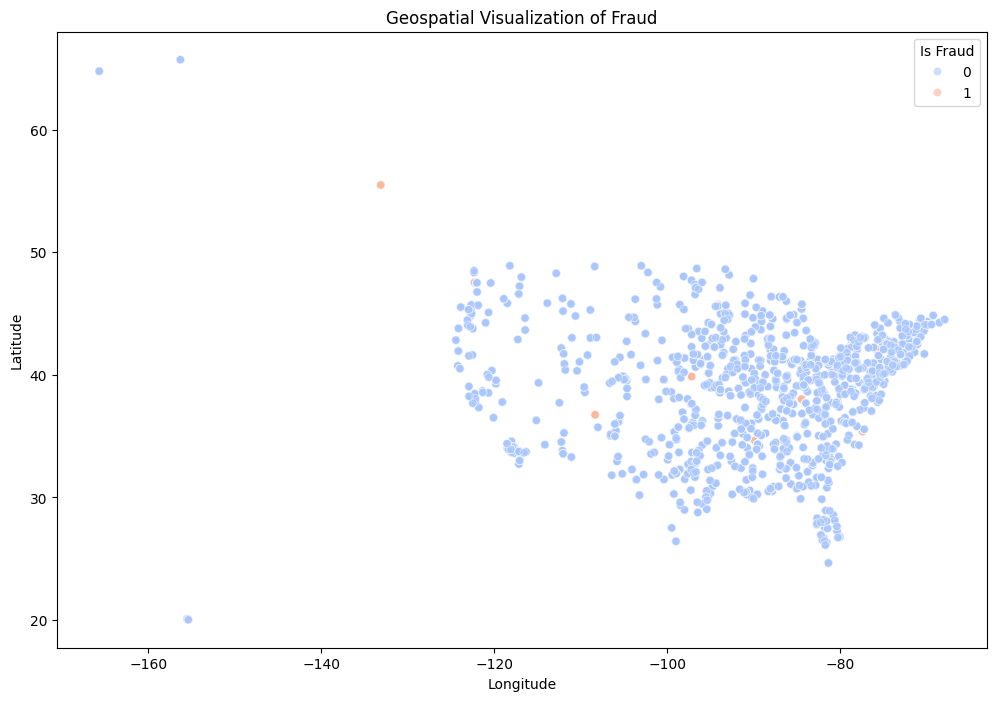

In [20]:
# Plot fraud incidents on a map
plt.figure(figsize=(12, 8))
sns.scatterplot(x='long', y='lat', hue='is_fraud', data=df, palette='coolwarm', alpha=0.6)
plt.title('Geospatial Visualization of Fraud')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Is Fraud', loc='upper right')
plt.show()

### Temporal Analysis

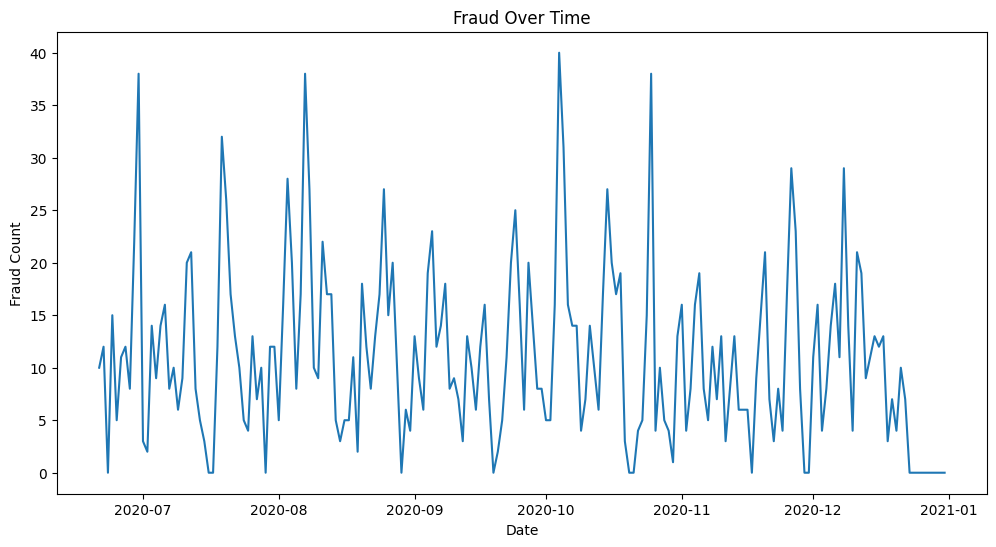

In [21]:
# Convert transaction time to datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Group by date and calculate fraud count
fraud_over_time = df.groupby(df['trans_date_trans_time'].dt.date)['is_fraud'].sum()

# Plot time series
plt.figure(figsize=(12, 6))
fraud_over_time.plot()
plt.title('Fraud Over Time')
plt.xlabel('Date')
plt.ylabel('Fraud Count')
plt.show()

### Features
#### Transaction Amount, City Population, and Fraud

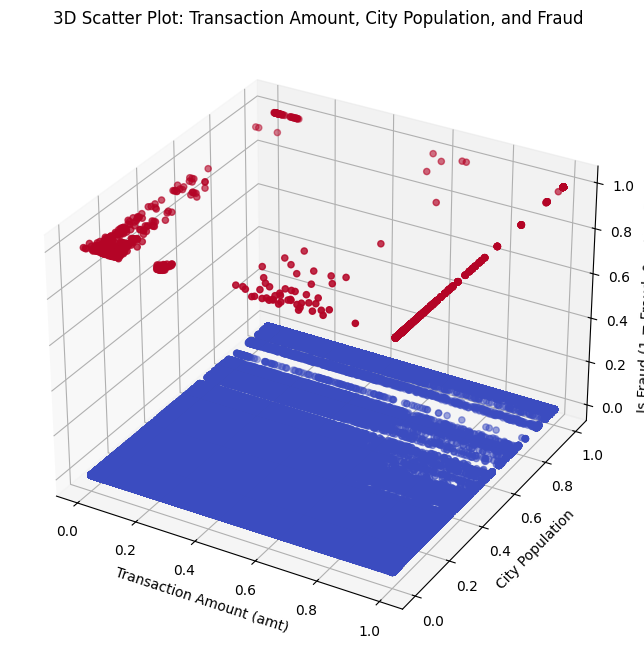

In [22]:
# 3D Scatter Plot: Transaction Amount, City Population, and Fraud
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(
    df_preprocessed['amt'],
    df_preprocessed['city_pop'],
    df_preprocessed['is_fraud'],
    c=df_preprocessed['is_fraud'],
    cmap='coolwarm',
    s=20
)

# Labels
ax.set_xlabel('Transaction Amount (amt)')
ax.set_ylabel('City Population')
ax.set_zlabel('Is Fraud (1 = Fraud, 0 = Non-Fraud)')
plt.title('3D Scatter Plot: Transaction Amount, City Population, and Fraud')
plt.show()

### City Population

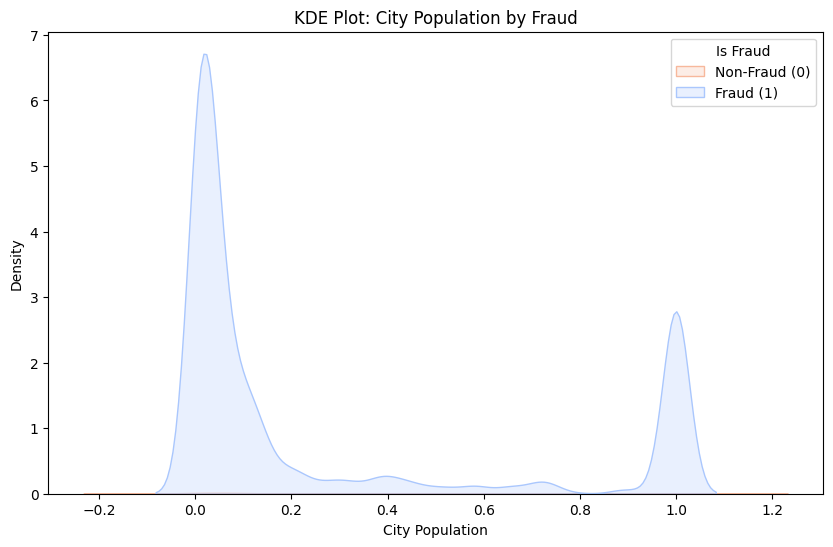

In [23]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_preprocessed, x='city_pop', hue='is_fraud', palette='coolwarm', fill=True)
plt.title('KDE Plot: City Population by Fraud')
plt.xlabel('City Population')
plt.ylabel('Density')
plt.legend(title='Is Fraud', labels=['Non-Fraud (0)', 'Fraud (1)'])
plt.show()

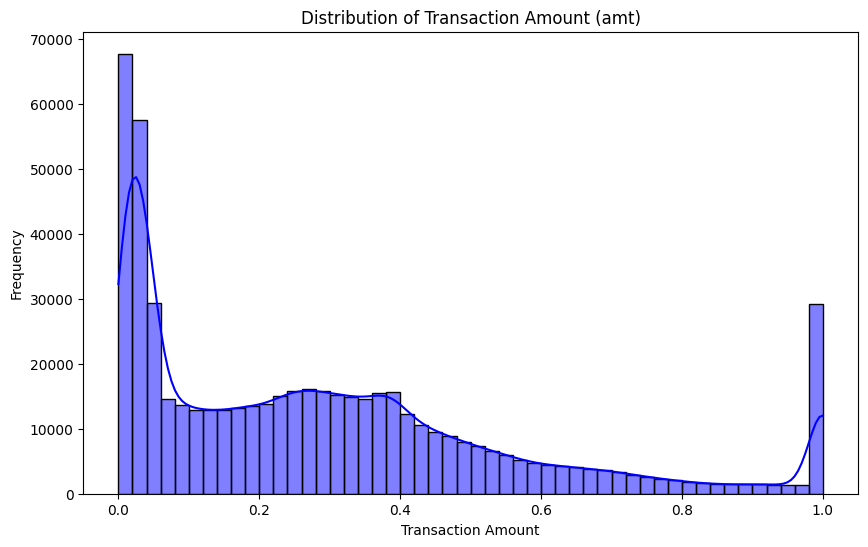

In [24]:
# Distribution of Transaction Amount (amt)
plt.figure(figsize=(10, 6))
sns.histplot(df_preprocessed['amt'], bins=50, kde=True, color='blue')
plt.title('Distribution of Transaction Amount (amt)')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

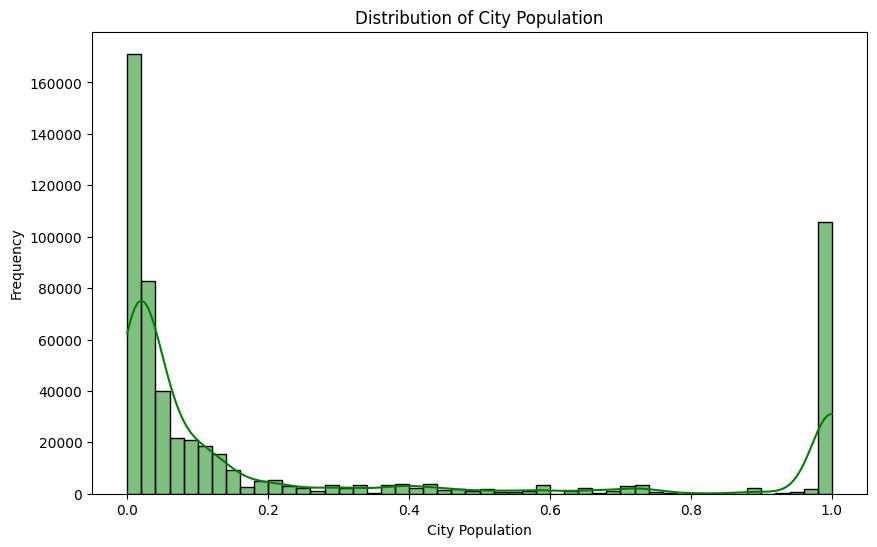

In [25]:
# Distribution of City Population
plt.figure(figsize=(10, 6))
sns.histplot(df_preprocessed['city_pop'], bins=50, kde=True, color='green')
plt.title('Distribution of City Population')
plt.xlabel('City Population')
plt.ylabel('Frequency')
plt.show()

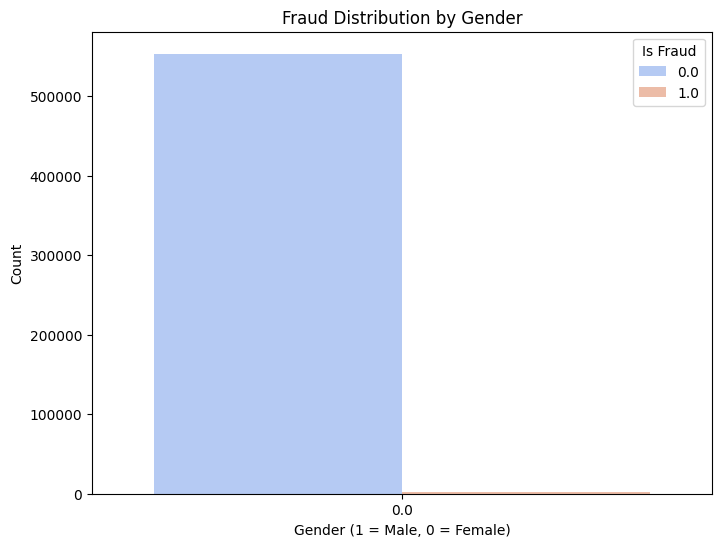

In [26]:
# Fraud Distribution by Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='is_fraud', data=df_preprocessed, palette='coolwarm')
plt.title('Fraud Distribution by Gender')
plt.xlabel('Gender (1 = Male, 0 = Female)')
plt.ylabel('Count')
plt.legend(title='Is Fraud', loc='upper right')
plt.show()

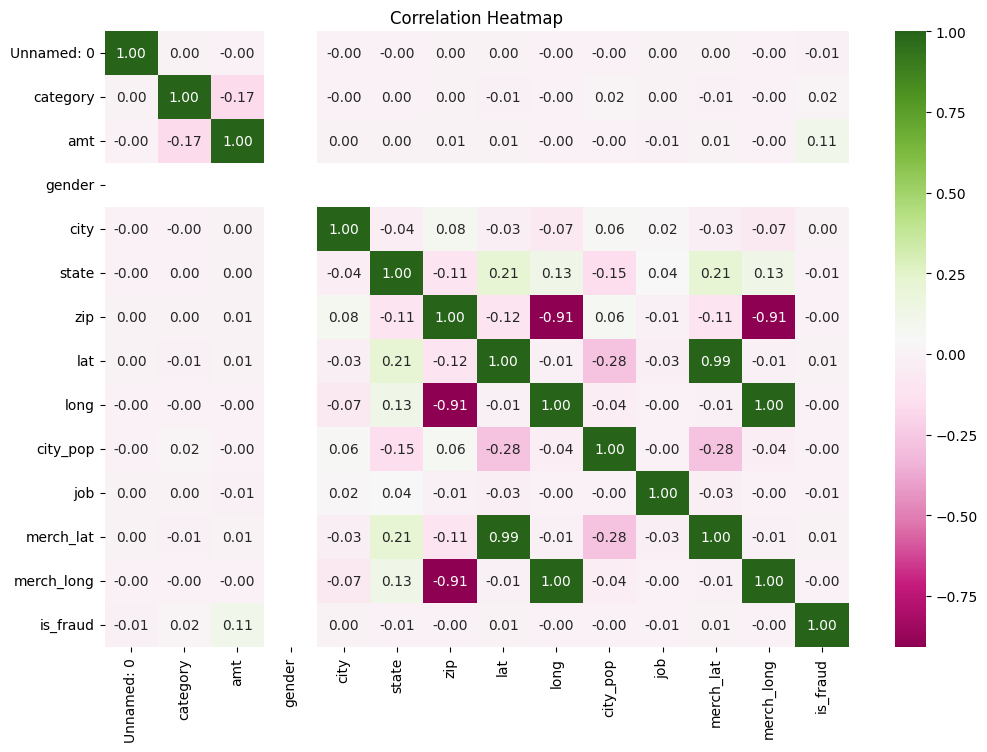

In [27]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
corr = df_preprocessed.corr()
sns.heatmap(corr, annot=True, cmap='PiYG', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

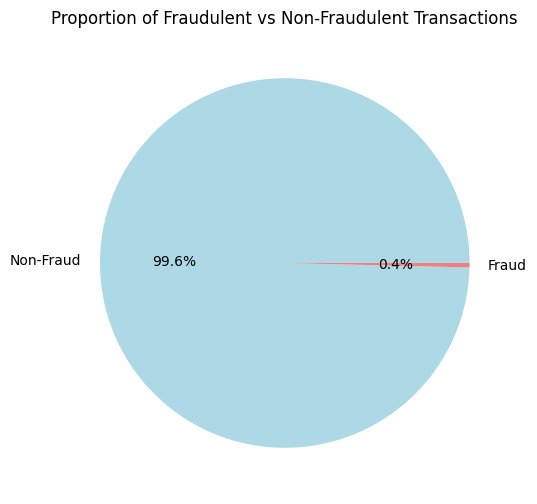

In [28]:
# Calculate fraud proportion
fraud_proportion = df['is_fraud'].value_counts(normalize=True)

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(fraud_proportion, labels=['Non-Fraud', 'Fraud'], autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Proportion of Fraudulent vs Non-Fraudulent Transactions')
plt.show()

# Apply SMOTE Oversampling

In [29]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Check class distribution before applying SMOTE
print("Class distribution before SMOTE:", Counter(y_train))

# Apply SMOTE with a sampling strategy that makes sense based on class distribution
smote = SMOTE(sampling_strategy='auto', random_state=42)  # Balances both classes equally
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Check the new class distribution after applying SMOTE
print("Class distribution after SMOTE:", Counter(y_train_balanced))

Class distribution before SMOTE: Counter({0.0: 442859, 1.0: 1716})
Class distribution after SMOTE: Counter({0.0: 442859, 1.0: 442859})


is_fraud
0.0    442859
1.0    442859
Name: count, dtype: int64


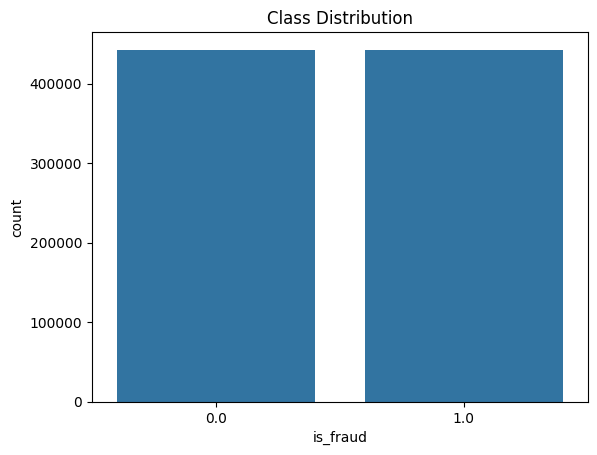

In [30]:
print(y_train_balanced.value_counts())
sns.countplot(x=y_train_balanced)
plt.title("Class Distribution")
plt.show()

# Build model

## Classify All Model

In [31]:
model1 = LogisticRegression()
model2 = RandomForestClassifier()
model3 = DecisionTreeClassifier()

Create function to check accuracy

In [32]:
from sklearn.metrics import accuracy_score

# Define a function for each metric
def acc_score(test, pred):
    acc_ = accuracy_score(test, pred)
    return acc_

# Print the scores
def print_score(test, pred, model):

    print(f"Classifier: {model}")
    print(f"ACCURACY: {accuracy_score(test, pred)*100}")

## LogisticRegression

In [33]:
model1.fit(X_train_balanced,y_train_balanced)

LogisticRegression()

In [34]:
y_pred = model1.predict(X_test)
lr=print_score(y_test, y_pred, "Logistic Regression")
lr

Classifier: Logistic Regression
ACCURACY: 83.74195538589083


In [35]:
model_list = []
acc_list = []

model_list.append(model1.__class__.__name__)
acc_list.append(round(acc_score(y_test, y_pred), 4)*100)

## RandomForestClassifier

In [36]:
model2.fit(X_train_balanced,y_train_balanced)

RandomForestClassifier()

In [37]:
y_pred1 = model2.predict(X_test)
print_score(y_test,y_pred1,"Random Forest")

Classifier: Random Forest
ACCURACY: 99.29319220313494


In [38]:
model_list.append(model2.__class__.__name__)
acc_list.append(round(acc_score(y_test, y_pred1), 4)*100)

## DecisionTreeClassifier

In [39]:
model3.fit(X_train_balanced,y_train_balanced)


DecisionTreeClassifier()

In [40]:
Y_Pred = model3.predict(X_test)
print_score(y_test,Y_Pred,"Decision Tree")

Classifier: Decision Tree
ACCURACY: 98.58615304528891


In [41]:
model_list.append(model3.__class__.__name__)
acc_list.append(round(acc_score(y_test, Y_Pred), 3)*100)

# Campare All Model

In [42]:
model_results = pd.DataFrame({"Model": model_list,
                              "Accuracy_Score": acc_list,
                              })

In [43]:
model_results

,Model,Accuracy_Score
0,LogisticRegression,83.74
1,RandomForestClassifier,99.29
2,DecisionTreeClassifier,98.60


Text(0, 0.5, 'Accuracy Score')

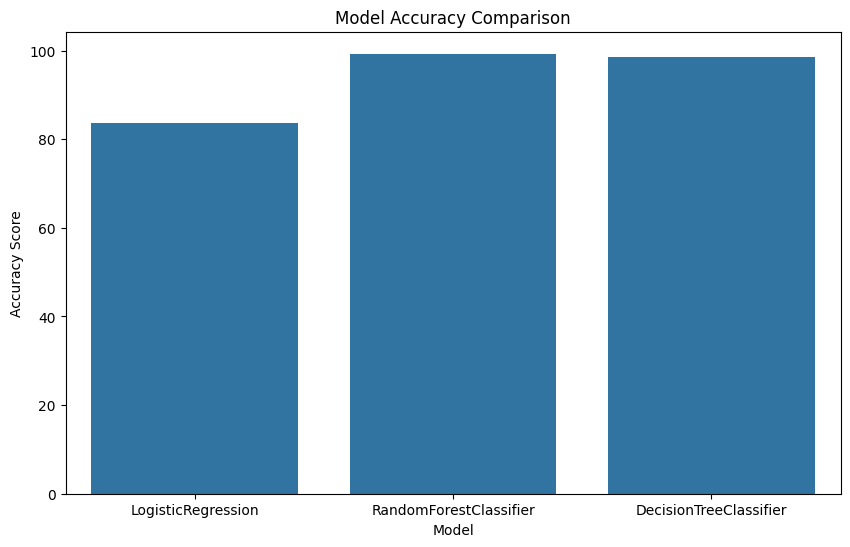

In [44]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy_Score', data=model_results)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')